In [2]:
from config import api_key
from yelpapi import YelpAPI
import requests
import pandas as pd
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt

In [3]:
cities = ["Anaheim,CA", "Santa Ana,CA", "Irvine,CA", "Huntington Beach,,CA", "Garden Grove,CA", "Orange,CA", "Fullerton,CA", "Costa Mesa,CA", "Mission Viejo,CA", "Westminster,CA"]
url = "https://api.yelp.com/v3/businesses/search"
headers = {'Authorization': 'Bearer %s' %api_key}
business_id = []
for c in cities: #since the search limit is 50, we set the radius about 3 miles
    params = {'term':"restaurant" ,"location": c,"limit": 50,"radius": 5000}
    responses = requests.get(url,headers = headers, params = params).json()
    for response in responses["businesses"]:
        business_id.append(response["id"])
        


In [4]:
yelp_api = YelpAPI(api_key)
responses = []
for b in business_id:
    responses.append(yelp_api.business_query(id = b))   

In [5]:
dates_time = []
ratings = []
for r in responses:
    try:
        dates_time.append(r["hours"][0]["open"])
        ratings.append(r["rating"])
    except KeyError: #some stores didn't list out operation hours
        continue
pprint(dates_time)

[[{'day': 0, 'end': '2300', 'is_overnight': False, 'start': '1700'},
  {'day': 1, 'end': '0000', 'is_overnight': False, 'start': '1700'},
  {'day': 2, 'end': '0000', 'is_overnight': False, 'start': '1700'},
  {'day': 3, 'end': '0000', 'is_overnight': False, 'start': '1700'},
  {'day': 4, 'end': '0000', 'is_overnight': False, 'start': '1700'},
  {'day': 5, 'end': '1600', 'is_overnight': False, 'start': '1200'},
  {'day': 5, 'end': '0000', 'is_overnight': False, 'start': '1700'},
  {'day': 6, 'end': '1600', 'is_overnight': False, 'start': '1200'},
  {'day': 6, 'end': '2300', 'is_overnight': False, 'start': '1700'}],
 [{'day': 0, 'end': '2130', 'is_overnight': False, 'start': '1100'},
  {'day': 1, 'end': '2130', 'is_overnight': False, 'start': '1100'},
  {'day': 2, 'end': '2130', 'is_overnight': False, 'start': '1100'},
  {'day': 3, 'end': '2130', 'is_overnight': False, 'start': '1100'},
  {'day': 4, 'end': '2200', 'is_overnight': False, 'start': '1100'},
  {'day': 5, 'end': '2200', 'is_o

 [{'day': 0, 'end': '0200', 'is_overnight': True, 'start': '1500'},
  {'day': 1, 'end': '0200', 'is_overnight': True, 'start': '1500'},
  {'day': 2, 'end': '0200', 'is_overnight': True, 'start': '1500'},
  {'day': 3, 'end': '0200', 'is_overnight': True, 'start': '1500'},
  {'day': 4, 'end': '0200', 'is_overnight': True, 'start': '1500'},
  {'day': 5, 'end': '0200', 'is_overnight': True, 'start': '1500'},
  {'day': 6, 'end': '0200', 'is_overnight': True, 'start': '1500'}],
 [{'day': 0, 'end': '2030', 'is_overnight': False, 'start': '1100'},
  {'day': 1, 'end': '2030', 'is_overnight': False, 'start': '1100'},
  {'day': 2, 'end': '2030', 'is_overnight': False, 'start': '1100'},
  {'day': 3, 'end': '2030', 'is_overnight': False, 'start': '1100'},
  {'day': 4, 'end': '2030', 'is_overnight': False, 'start': '1100'},
  {'day': 5, 'end': '2030', 'is_overnight': False, 'start': '1100'},
  {'day': 6, 'end': '2000', 'is_overnight': False, 'start': '1100'}],
 [{'day': 0, 'end': '1400', 'is_overnig

In [6]:
total_hours = []
for date_time in dates_time:
    total = 0
    for x in range(len(date_time)):
        if int(date_time[x]["end"]) == 0:
            total += 2400-int(date_time[x]["start"])
        elif int(date_time[x]["end"]) < 600:
#             print(date_time[x]["day"])
            total += int(date_time[x]["end"])+2400 - int(date_time[x]["start"])
        else:
            total += int(date_time[x]["end"])-int(date_time[x]["start"])
            if total < 0:
                print(total)
                print(date_time[x]["end"])
    total_hours.append(round(total/100)) #sum of operation hours
    


In [7]:
print(len(ratings))
print(len(total_hours))

492
492


In [8]:
business_id2 = []
for c2 in cities:
    params = {'term':"restaurant" ,"location": c2,"limit": 50,"offset":50,"radius": 5000,}
    responses = requests.get(url,headers = headers, params = params).json()
    for response in responses["businesses"]:
        business_id2.append(response["id"])

In [9]:
yelp_api = YelpAPI(api_key)
responses2 = []
for b2 in business_id2:
    responses2.append(yelp_api.business_query(id = b2))  

In [10]:
dates_time2 = []
# ratings2=[]
for r2 in responses2:
    try:
        dates_time2.append(r2["hours"][0]["open"])
        ratings.append(r2["rating"])
    except KeyError: #some stores didn't list out operation hours
        continue


In [11]:
pprint(dates_time2)

[[{'day': 0, 'end': '2200', 'is_overnight': False, 'start': '1100'},
  {'day': 1, 'end': '2200', 'is_overnight': False, 'start': '1100'},
  {'day': 2, 'end': '2200', 'is_overnight': False, 'start': '1100'},
  {'day': 3, 'end': '2200', 'is_overnight': False, 'start': '1100'},
  {'day': 4, 'end': '2300', 'is_overnight': False, 'start': '1100'},
  {'day': 5, 'end': '1430', 'is_overnight': False, 'start': '1100'},
  {'day': 5, 'end': '2300', 'is_overnight': False, 'start': '1600'},
  {'day': 6, 'end': '1430', 'is_overnight': False, 'start': '1100'},
  {'day': 6, 'end': '2100', 'is_overnight': False, 'start': '1600'}],
 [{'day': 0, 'end': '2100', 'is_overnight': False, 'start': '0700'},
  {'day': 1, 'end': '2100', 'is_overnight': False, 'start': '0700'},
  {'day': 2, 'end': '2100', 'is_overnight': False, 'start': '0700'},
  {'day': 3, 'end': '2100', 'is_overnight': False, 'start': '0700'},
  {'day': 4, 'end': '2100', 'is_overnight': False, 'start': '0700'},
  {'day': 5, 'end': '2100', 'is_o

  {'day': 5, 'end': '0200', 'is_overnight': True, 'start': '1100'},
  {'day': 6, 'end': '2200', 'is_overnight': False, 'start': '1100'}],
 [{'day': 0, 'end': '1400', 'is_overnight': False, 'start': '1130'},
  {'day': 0, 'end': '2200', 'is_overnight': False, 'start': '1730'},
  {'day': 1, 'end': '1400', 'is_overnight': False, 'start': '1130'},
  {'day': 1, 'end': '2200', 'is_overnight': False, 'start': '1730'},
  {'day': 2, 'end': '1400', 'is_overnight': False, 'start': '1130'},
  {'day': 2, 'end': '2200', 'is_overnight': False, 'start': '1730'},
  {'day': 3, 'end': '1400', 'is_overnight': False, 'start': '1130'},
  {'day': 3, 'end': '2200', 'is_overnight': False, 'start': '1730'},
  {'day': 4, 'end': '1400', 'is_overnight': False, 'start': '1130'},
  {'day': 4, 'end': '2230', 'is_overnight': False, 'start': '1730'},
  {'day': 5, 'end': '2230', 'is_overnight': False, 'start': '1700'},
  {'day': 6, 'end': '2130', 'is_overnight': False, 'start': '1700'}],
 [{'day': 0, 'end': '2000', 'is_o

In [12]:
# total_hours2=[]
for date_time2 in dates_time2:
    total = 0
    for x2 in range(len(date_time2)):
        if int(date_time2[x2]["end"]) == 0:
            total += 2400-int(date_time2[x2]["start"])
        elif int(date_time2[x2]["end"]) < 1000:
#             print(date_time[x]["day"])
            total += int(date_time2[x2]["end"])+2400 - int(date_time2[x2]["start"])
        else:
            total += int(date_time2[x2]["end"])-int(date_time2[x2]["start"])
            if total < 0:
                print(total)
                print(date_time2[x]["end"])
    total_hours.append(round(total/100)) #sum of operation hours
    

In [13]:
print(len(ratings))
print(len(total_hours))

977
977


In [66]:
hours_ratings = pd.DataFrame({"Hours": total_hours,
                             "Ratings": ratings})
hours_ratings

,Hours,Ratings
0,55,4.5
1,74,4.0
2,35,4.5
3,70,4.0
4,79,4.0
5,65,4.5
6,30,4.5
7,41,4.5
8,75,4.0
9,126,4.5


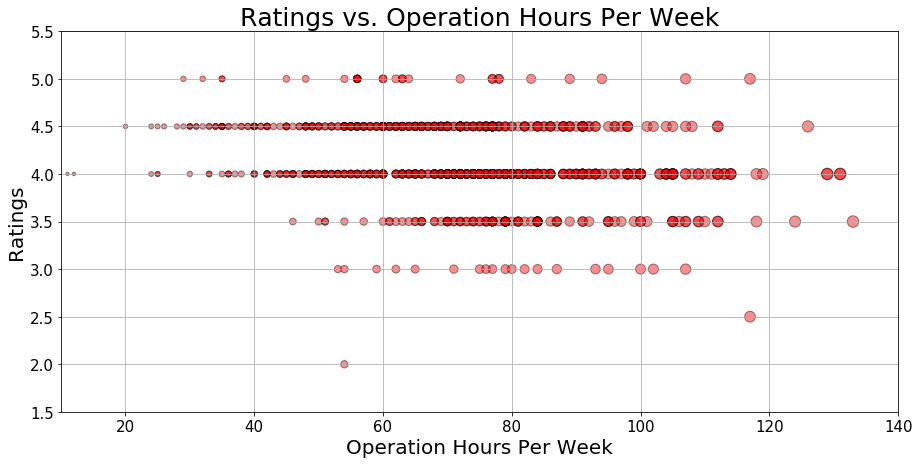

In [90]:
plt.figure(figsize=(15,7))
plt.scatter(total_hours, ratings, marker="o", facecolors="red", edgecolors="black",
            s=total_hours*25, alpha=0.45)

plt.rc('ytick', labelsize=20)
plt.rc('xtick', labelsize=20) 
plt.rc('axes', titlesize=25)
plt.rc('axes', labelsize=15)

plt.title("Ratings vs. Operation Hours Per Week")
plt.xlabel("Operation Hours Per Week", fontsize=20)
plt.ylabel("Ratings", fontsize=20)
plt.grid(True)
plt.xlim([10, 140])
plt.ylim([1.5, 5.5])
plt.show()


In [104]:
group_by_rating = hours_ratings.groupby(['Ratings'])
avg_hours = group_by_rating.mean()
avg_hours.drop(avg_hours.index[:1], inplace=True)
avg_hours

,Hours
Ratings,
2.5,117.000000
3.0,83.450000
3.5,84.212389
4.0,74.164211
4.5,64.592920
5.0,64.357143


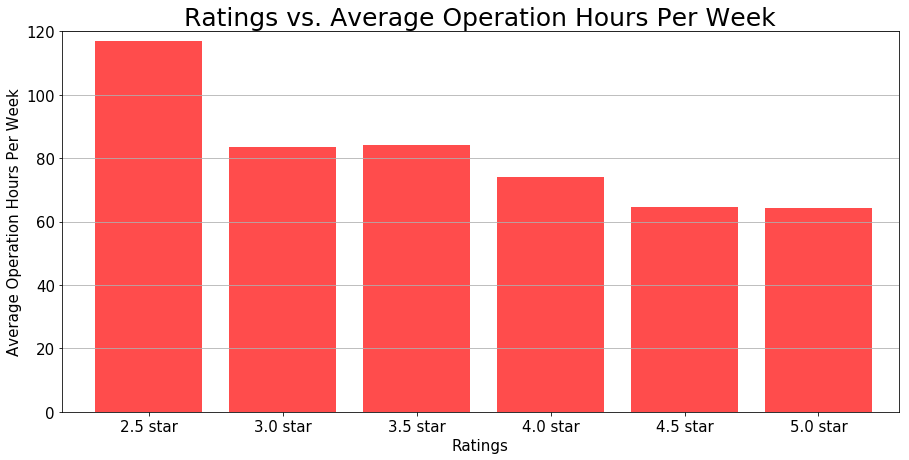

In [105]:
plt.figure(figsize=(15,7))
plt.rc('ytick', labelsize=15)
plt.rc('xtick', labelsize=15) 
plt.rc('axes', titlesize=25)
plt.rc('axes', labelsize=15)

stars = ["2.5 star", "3.0 star", "3.5 star", "4.0 star", "4.5 star", "5.0 star"]

x_axis = np.arange(len(avg_hours))
plt.bar(x_axis, avg_hours['Hours'], color='r', alpha=0.7, align='edge')


tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, stars)
plt.xlim(-0.25,len(x_axis))
plt.ylim(0, 120)

plt.title('Ratings vs. Average Operation Hours Per Week')
plt.xlabel('Ratings', fontsize=15)
plt.ylabel('Average Operation Hours Per Week', fontsize=15)
plt.legend()
plt.gca().yaxis.grid(True)
plt.show()
